# Deep Learning avec Tensorflow

Les réseaux de neurones artificiels ou **RNN** sont des modèles mathématiques inspirés de la biologie.  La brique de base de ces réseaux, le neurone artificiel, était issu au départ d'une volonté de modélisation du fonctionnement d'un neurone biologique. 

![Neurone biologique, source: https://commons.wikimedia.org/wiki/File:Complete_neuron_cell_diagram_fr.svg](Images/neurone.png)

Schématiquement, on peut décomposer le neurone en 3 grandes entités :

- un corps cellulaire, appelé péricaryon: encore appelé neurone artificiel ou neurone formel, cherche à reproduire le fonctionnement d'un neurone biologique.

- un ensemble de dendrites (de l'ordre de 7 000): sont les capteurs du neurone. Elles transmettent l'influx nerveux (l'information) généré par des stimuli de leur extrémité au péricaryon. On dit que le flux est centripète.

- un axone.  

L'apprentissage d'un neurone se fait par optimisation d'une fonction de perte. C'est-à-dire que l'on va chercher les paramètres w et b , qui minimisent la fonction de perte. Dans le cas de la classification, on va utiliser la log-vraisemblance négative.

$$L(\hat{y} = −(y.log(\hat{y})+(1−y).log(1−\hat{y})$$  


Les sorties de chaque neurone sont concaténées pour former un vecteur $y$. Les entrées sont toujours un vecteur $x$. Le calcul de la sortie se fait par les équations :

$$S_j = \sum_i{W_{ji}x_i}$$
$$y_i = f(S_j)$$

On applique une descente de gradient pour ce réseaux.

### Rétropropagation du gradient
Nous allons commencer par calculer le gradient des paramètres de la dernière couche, puis propager le gradient vers les entrées de la dernière couche (ce qui correspond au gradient de la sortie de la couche précédente). Ainsi, on peut calculer le gradient des paramètres de l'avant-dernière couche, puis le gradient de son entrée. Et ainsi de suite, couche à couche, de la dernière à la première. C'est ce qu'on appelle la **rétropropagation du gradient**.



Pour modéliser un problème non linéaire, nous pouvons introduire directement une non-linéarité. Nous pouvons appliquer à chaque nœud de la couche cachée une fonction linéaire.

Dans le modèle représenté par le graphique suivant, la valeur de chaque nœud de la couche cachée 1 est transformée par une fonction non linéaire avant d'être transférée aux sommes pondérées de la couche suivante. Cette fonction non linéaire est appelée "fonction d'activation".
![Activation, source: https://developers.google.com/machine-learning/crash-course/introduction-to-neural-networks/anatomy?hl=fr](Images/activation.svg)

## Les Tensors
Les tenseurs sont des tableaux multidimensionnel

Les tenseurs contiennent souvent des flotteurs et des entiers, mais ont de nombreux autres types, notamment: nombres complexes, cordes

In [30]:
scalaire = tf.constant(4, name="scalaire"), print(scalaire, "\n", "--------", "\n")
vecteur = tf.constant([2.0, 3.0, 4.0])
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]])
print(tf.add(a, b), "\n", "--------", "\n")         # Same print(a+b)
print(tf.multiply(a, b), "\n", "--------", "\n")    # Multiplie a_i*b_i
print(tf.matmul(a, b), "\n", "--------", "\n")      # Multiplication matricielle

(<tf.Tensor: shape=(), dtype=int32, numpy=4>, None) 
 -------- 

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 
 -------- 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 
 -------- 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 
 -------- 



In [40]:
print("Type of every element:", vecteur.dtype)
print("Number of dimensions:", vecteur.ndim)
print("Shape of tensor:", vecteur.shape)
print("First:", vecteur[0].numpy())
print("Second row:", matrice[1, :].numpy())

Type of every element: <dtype: 'float32'>
Number of dimensions: 1
Shape of tensor: (3,)
First: 2.0
Second row: [3. 4.]


In [41]:
# Sparse tensors store values by index in a memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, "\n")

# You can convert sparse tensors to dense
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)


## Variables

In [42]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)

print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Shape:  (2, 2)
DType:  <dtype: 'float32'>
As NumPy:  [[1. 2.]
 [3. 4.]]


In [43]:
a = tf.Variable([2.0, 3.0])
# Create b based on the value of a
b = tf.Variable(a)
a.assign([5, 6])

# a and b are different
print(a.numpy(), "\n")
print(b.numpy(), "\n")

# There are other versions of assign
print(a.assign_add([2,3]).numpy(), "\n")  # [7. 9.]
print(a.assign_sub([7,9]).numpy())

[5. 6.] 

[2. 3.] 

[7. 9.] 

[0. 0.]


## Calcul des gradients
En bref, un gradient est un vecteur de dérivées partielles indiquant la direction à suivre pour atteindre le minimum recherché. Un gradient étant un vecteur, il présente les deux caractéristiques suivantes : une direction, une magnitude.

Les algorithmes de descente de gradient multiplient généralement le gradient par une valeur scalaire appelée **taux d'apprentissage** (ou parfois pas d'apprentissage) pour déterminer le point suivant. Par exemple, si la magnitude du gradient est de 2,5 et que le taux d'apprentissage est de 0,01, alors l'algorithme de descente de gradient sélectionnera le point suivant situé à une distance de 0,025 du point précédent.

In [47]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_mean(y**2)

[dl_dw, dl_db] = tape.gradient(loss, [w, b])
print(w.shape)
print(dl_dw.shape)

(3, 2)
(3, 2)


In [140]:
# Par rapport à un modèle
layer = tf.keras.layers.Dense(2, activation='relu')
x = tf.constant([[1., 2., 3.]])

with tf.GradientTape() as tape:
  # Forward pass
  y = layer(x)
  loss = tf.reduce_mean(y**2)

# Calculate gradients with respect to every trainable variable
grad = tape.gradient(loss, layer.trainable_variables)

for var, g in zip(layer.trainable_variables, grad):
  print(f'{var.name}, shape: {g.shape}')

dense_2/kernel:0, shape: (3, 2)
dense_2/bias:0, shape: (2,)


[[1.0, 2.0, 3.0], [1, 1, 2]]


## Perceptrons
Le perceptron peut être vu comme le type de réseau de neurones le plus simple. C'est un classifieur linéaire. Ce type de réseau neuronal ne contient aucun cycle (il s'agit d'un réseau de neurones à propagation avant). Dans sa version simplifiée, le perceptron est mono-couche et n'a qu'une seule sortie (booléenne) à laquelle toutes les entrées (booléennes) sont connectées. Plus généralement, les entrées peuvent être des nombres réels.

## API Séquential

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

La fonction d'activation d'unité de rectification linéaire (ou ReLU) est souvent un peu plus efficace qu'une fonction lisse de type sigmoïde, tout en étant bien plus simple à calculer.

$$F(x) = \max(0,x)$$

Un modèle séquentiel n'est pas approprié lorsque:

- Votre modèle a plusieurs entrées ou plusieurs sorties
- Chacune de vos couches a plusieurs entrées ou plusieurs sorties
- Vous devez faire un partage de couches
- Vous voulez une topologie non linéaire (par exemple une connexion résiduelle, un modèle multi-branches)

In [24]:
# Accès aux coches du model
model.layers

## API Fonctionnal
L'API fonctionnelle peut gérer des modèles avec une topologie non linéaire, des couches partagées et même plusieurs entrées ou sorties.

L'idée principale est qu'un modèle d'apprentissage en profondeur est généralement un graphe acyclique dirigé (DAG) de couches. L'API fonctionnelle est donc un moyen de créer des graphiques de couches .

In [3]:
# Création de la forme des données d'entrées
inputs = keras.Input(shape=(784,))

# Création des noeuds
dense = layers.Dense(64, activation="relu", name = "layer1")
x = dense(inputs)

# Ajout de nouveaux noeuds
x = layers.Dense(64, activation="relu", name = "x_layer")(x)
outputs = layers.Dense(10, name = "output_layer")(x)

# Création du model
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

# Résumé du model
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
layer1 (Dense)               (None, 64)                50240     
_________________________________________________________________
x_layer (Dense)              (None, 64)                4160      
_________________________________________________________________
output_layer (Dense)         (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


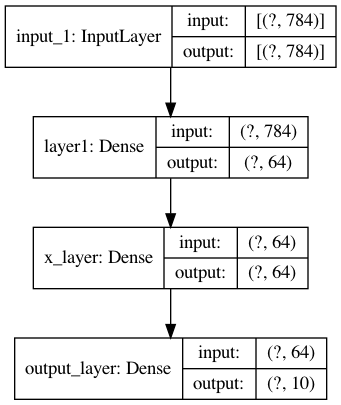

In [9]:
keras.utils.plot_model(model, "my_first_model.png", show_shapes = True)

In [4]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 4s 6ms/step - loss: 0.3550 - accuracy: 0.8994 - val_loss: 0.1885 - val_accuracy: 0.9439
Epoch 2/2
750/750 [==============================] - 3s 4ms/step - loss: 0.1643 - accuracy: 0.9503 - val_loss: 0.1488 - val_accuracy: 0.9548
313/313 - 0s - loss: 0.1439 - accuracy: 0.9570
Test loss: 0.14388468861579895
Test accuracy: 0.9570000171661377


In [52]:
#model.save("path_to_my_model") # sauvegarder le modèle
#del model # Supprimer le modèle
# Recreate the exact same model purely from the file:
#model = keras.models.load_model("path_to_my_model") # Importer le modèle

(60000, 28, 28)

## Convolutionnal Neural Networks (CNN)

Le CNN est un algorithme très puissant et adapté aux traitements d'images.

L’architecture CNN dispose en amont d’une partie convolutive et comporte par conséquent deux parties bien distinctes :

- Une partie convolutive : Son objectif final est d’extraire des *caractéristiques propres* à chaque image en les compressant de façon à réduire leur taille initiale. En résumé, l’image fournie en entrée passe à travers une succession de filtres, créant par la même occasion de nouvelles images appelées cartes de convolutions. Enfin, les cartes de convolutions obtenues sont concaténées dans **un vecteur de caractéristiques** appelé code CNN.

- Une partie classification : Le code CNN obtenu en sortie de la partie convolutive est fourni en entrée dans une deuxième partie, constituée de couches entièrement connectées appelées **perceptron multicouche** (MLP pour Multi Layers Perceptron). Le rôle de cette partie est de combiner les caractéristiques du code CNN afin de classer l’image. Pour revenir sur cette partie, n’hésitez pas à consulter l’article sur le sujet . 

![CNN](Images/CNN.jpeg)

### Feature maps
Une convolution est un filtre qui passe sur une image, la traite et en extrait les caractéristiques importantes. Disons que vous avez l'image d'une personne portant une sneaker. Comment déceleriez-vous qu'une sneaker est présente dans l'image? Pour que votre programme "voie" l'image comme une sneaker, vous devrez extraire les fonctionnalités importantes et brouiller les fonctionnalités inutiles. C'est ce qu'on appelle le mappage des fonctionnalités. 

Le processus de cartographie des caractéristiques est théoriquement simple. Vous allez scanner chaque pixel de l'image, puis regarder ses pixels voisins. Vous multipliez les valeurs de ces pixels par les poids équivalents dans un filtre.

![](Images/convo.png)

### Max Pooling
Le **Max-Pooling** est un processus de discrétisation basé sur des échantillons. Son objectif est de sous-échantillonner une représentation d’entrée (image, matrice de sortie de couche cachée, etc.) en réduisant sa dimension. De plus, son intérêt est qu’il réduit le coût de calcul en réduisant le nombre de paramètres à apprendre et fournit une invariance par petites translations (si une petite translation ne modifie pas le maximum de la région balayée, le maximum de chaque région restera le même et donc la nouvelle matrice créée restera identique).

Pour rendre plus concret l’action du Max-Pooling, voici un exemple : imaginons que nous avons une matrice 4×4 représentant notre entrée initiale et un filtre d’une fenêtre de taille 2×2 que nous appliquerons sur notre entrée. Pour chacune des régions balayées par le filtre, le max-pooling prendra le maximum, créant ainsi par la même occasion une nouvelle matrice de sortie où chaque élément correspondra aux maximums de chaque région rencontrée.

La fenêtre de filtre se déplace de deux pixels vers la droite (stride/pas = 2) et récupère à chaque pas “l’argmax” correspondant à la valeur la plus grande parmi les 4 valeurs de pixels.

![Max-Pooling](Images/max_pooling.png)

L’algorithme que les perceptrons utilisent pour mettre à jour leurs poids (ou coefficients de réseaux) s’appelle la rétropropagation du gradient de l’erreur, célèbre algorithme de descente de gradient que nous verrons plus en détail par la suite . 

### Architecture CNN
- Couche de convolution (CONV): recherche les caractéristiques (features maps) des données d'entrées.

- Couche Pooling: reçoit les features maps puis opère une réduction de dimensions tout en préservant les caractéristiques les plus essentielles.

- Couche d'activation ReLU: remplace toute valeur négative reçues en entrée par des zéros. L’intérêt de ces couches d’activation est de rendre le modèle non linéaire et de ce fait plus complexe

- Couche Fully Connected (FC) :  Ces couches sont placées en fin d’architecture de CNN et sont entièrement connectées à tous les neurones de sorties (d’où le terme fully-connected). Après avoir reçu un vecteur en entrée, la couche FC applique successivement une combinaison linéaire puis une fonction d’activation dans le but final de classifier l’input image. Elle renvoie enfin en sortie un vecteur de taille $d$ correspondant au nombre de classes dans lequel chaque composante représente la probabilité pour l’input image d’appartenir à une classe.

L'expression général d'une convolution est:
$$g(x,y) = w*f(x,y) = \sum_{dx=-a}^{a} \sum_{dy=-b}^{b} w(dx,dy)f(x+dx, y+dy)$$

où $g(x,y)$ l'image filtrée, $f(x,y)$ est l'image originale, $w$ est le noyeau

## Exemple

In [49]:
from __future__ import absolute_import, division,print_function, unicode_literals
import numpy as np
import tensorflow as tf
from tensorflow import keras as ks 
print(tf.__version__)

2.2.0


Nous utilisons le jeu de données Fashion-MNIST de Tensorflow qui contient 70 000 images avec 10 différentes catégories. Chaque image a une taille de 28x28 pixels dont les valeurs sont comprises entre 0 et 255. Chaque image est étiquettée entre 0 et 9. 0 représentant, par exemple, T-Shirt, 1 ==> Trousse, ...

Les données sont réparties en données d'apprentissage (60 000) et en données test (10 000). 

In [33]:
mnist_fashion = ks.datasets.fashion_mnist
(training_images, training_labels), (test_images,test_labels) = mnist_fashion.load_data()

In [37]:
print('Training Dataset Shape: {}'.format(training_images.shape))
print('No. of Training Dataset Labels: {}'. format(len(training_labels)))
print('Test Dataset Shape: {}'.format(test_images.shape))
print('No. of Test Dataset Labels: {}'.format(len(test_labels)))

Training Dataset Shape: (60000, 28, 28)
No. of Training Dataset Labels: 60000
Test Dataset Shape: (10000, 28, 28)
No. of Test Dataset Labels: 10000


Comme les images sont comprises entre 0 et 255, nous allons les réduire pour qu'elles puissent être entre 0 et 1 

In [38]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [39]:
training_images = training_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print('Training Dataset Shape: {}'.format(training_images.shape))
print('No. of Training Dataset Labels: {}'. format(len(training_labels)))

Training Dataset Shape: (60000, 28, 28, 1)
No. of Training Dataset Labels: 60000


- **Sequential** pour ajouter des couches les une après les autres

- **filters** est le nombre de filtres 

- **kernel_size** est la taille du noyeau de covolution. Si on renseigne une seule valeur, exemple 3, cela sera traduit directement par une matrice de 3 x 3.

- **stride** est le pas de déplacement du filtre. Par défaut stride=1

- **padding** est soit 'same' ou 'valid'. Par défaut padding='valid' si tel est le cas, la taille des nouvelles featur maps est réduite de kernel_size-1 sur la couche suivante.

- **dropout** permet d'appliquer cette solution de "suppression" de neurones. En réalité la valeur de sortie est mise à 0. Cette fonction s'applique en sortie d'une couche de neurones. On passe en paramètre `rate` qui indique la probabilité qu'un neurone soit supprimé (doit être = 0 lors de la phase de test).

- **input_shape** est la taille de l'image en pixel (28,28) et le code couleur de l'image (1)

- **name** on peut donner un nom spécifique à notre couche

In [72]:
cnn_model = ks.models.Sequential() 
cnn_model.add(ks.layers.Conv2D(filters = 64, kernel_size=3, 
                                activation='relu',
                                input_shape=(28, 28, 1), 
                                name='Conv2D_layer'))
cnn_model.add(ks.layers.MaxPooling2D((2, 2), name='Maxpooling_2D'))
cnn_model.add(ks.layers.Flatten(name='Flatten'))
cnn_model.add(ks.layers.Dense(128, activation='relu',name='Hidden_layer'))
cnn_model.add(ks.layers.Dense(10, activation='softmax',name='Output_layer'))

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(training_images, training_labels, epochs=20, batch_size = 500)

training_loss, training_accuracy = cnn_model.evaluate(training_images, training_labels)
print('Training Accuracy {}'. format(round(float(training_accuracy), 2)))

Epoch 1/20
120/120 [==============================] - 60s 500ms/step - loss: 0.5378 - accuracy: 0.8160
Epoch 2/20
120/120 [==============================] - 61s 512ms/step - loss: 0.3346 - accuracy: 0.8823
Epoch 3/20
120/120 [==============================] - 54s 447ms/step - loss: 0.2904 - accuracy: 0.8984
Epoch 4/20
120/120 [==============================] - 53s 445ms/step - loss: 0.2617 - accuracy: 0.9072
Epoch 5/20
120/120 [==============================] - 51s 424ms/step - loss: 0.2424 - accuracy: 0.9128
Epoch 6/20
120/120 [==============================] - 48s 397ms/step - loss: 0.2224 - accuracy: 0.9194
Epoch 7/20
120/120 [==============================] - 55s 462ms/step - loss: 0.2104 - accuracy: 0.9241
Epoch 8/20
120/120 [==============================] - 45s 379ms/step - loss: 0.1935 - accuracy: 0.9302
Epoch 9/20
120/120 [==============================] - 46s 385ms/step - loss: 0.1790 - accuracy: 0.9366
Epoch 10/20
120/120 [==============================] - 49s 409ms/step - l

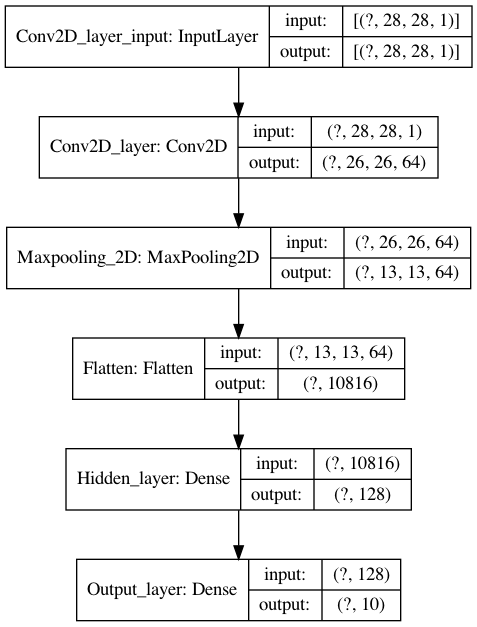

In [73]:
plot_model(cnn_model, to_file='cnn-mnist.png', show_shapes=True)

In [81]:
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels)
print('Training Accuracy {}'. format(round(float(test_accuracy), 2)))

313/313 [==============================] - 5s 15ms/step - loss: 0.2718 - accuracy: 0.9163
Training Accuracy 0.92


Avec une seule couche de convolution, on a une accuracy de 97% sur les données train. 

Le choix des hypermatères est, d'après mes lectures, un choix intuitif qui vient avec l'expérience. Ces choix peuvent être modifiés pour améliorer le modèle. 

En essaynt une epochs = 5, j'avais une accuracy de 95%, epochs=10 ==> acc=97%
Avec un filtre de 32, on peut avoir une accuracy avoisinant 94%. Ainsi de suite...

En résumé, ce serait mieux de faire une fonction qui permet de tester différentes configurations pour avoir une accuracy convenable. Cela prend certe du temps, mais c'est un moyen efficace.

Voyons voir qu'est ce que cela donnera en ajoutant une nouvelle couche de convolution

In [74]:
cnn_model2 = ks.models.Sequential() 
cnn_model2.add(ks.layers.Conv2D(filters = 32, kernel_size=3, 
                                activation='relu',
                                input_shape=(28, 28, 1), 
                                name='Conv2D_layer'))
cnn_model2.add(ks.layers.MaxPooling2D((2, 2), name='Maxpooling_2D'))
cnn_model2.add(Dropout(0.25))
cnn_model2.add(ks.layers.Conv2D(filters = 64, kernel_size=3, 
                                activation='relu',
                                input_shape=(28, 28, 1), 
                                name='Conv2D_layer2'))
cnn_model2.add(ks.layers.MaxPooling2D((2, 2), name='Maxpooling_2D2'))
cnn_model2.add(Dropout(0.25))
cnn_model2.add(ks.layers.Flatten(name='Flatten'))
cnn_model2.add(ks.layers.Dense(128, activation='relu',name='Hidden_layer'))
cnn_model2.add(ks.layers.Dense(10, activation='softmax',name='Output_layer'))

cnn_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model2.fit(training_images, training_labels, epochs=20, batch_size = 500)

training_loss, training_accuracy = cnn_model2.evaluate(training_images, training_labels)
print('Training Accuracy {}'. format(round(float(training_accuracy), 2)))

Epoch 1/20
120/120 [==============================] - 78s 647ms/step - loss: 0.8107 - accuracy: 0.7053
Epoch 2/20
120/120 [==============================] - 75s 628ms/step - loss: 0.4995 - accuracy: 0.8172
Epoch 3/20
120/120 [==============================] - 75s 621ms/step - loss: 0.4339 - accuracy: 0.8439
Epoch 4/20
120/120 [==============================] - 73s 609ms/step - loss: 0.3957 - accuracy: 0.8560
Epoch 5/20
120/120 [==============================] - 85s 708ms/step - loss: 0.3666 - accuracy: 0.8679
Epoch 6/20
120/120 [==============================] - 86s 717ms/step - loss: 0.3475 - accuracy: 0.8753
Epoch 7/20
120/120 [==============================] - 78s 650ms/step - loss: 0.3323 - accuracy: 0.8788
Epoch 8/20
120/120 [==============================] - 70s 585ms/step - loss: 0.3166 - accuracy: 0.8850
Epoch 9/20
120/120 [==============================] - 62s 513ms/step - loss: 0.3046 - accuracy: 0.8893
Epoch 10/20
120/120 [==============================] - 61s 506ms/step - l

Avec plusieurs configurations testées, l'ajout d'une deuxième couche de convolution donne une plus petite accuracy. La meiileure accuracy que j'ai pu obtenir est de 95%, en mettan une epoch=10 et batch_size=32. 

Pour ces données, il convierait alors soit de garder une seule couche de convolution, soit d'en rajouter pour voir. Après la question que l'on peut se poser est pourquoi cela marcherai avec plus de 2 couches sachant qu'avec 2 couches on a déjà une accuracy qui baisse. 

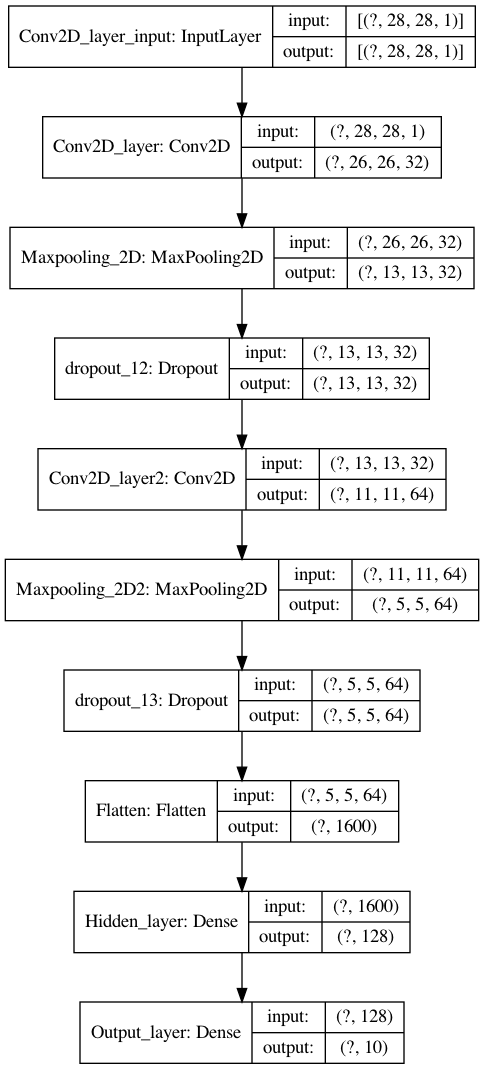

In [75]:
plot_model(cnn_model2, to_file='cnn-mnist.png', show_shapes=True)

In [77]:
test_loss, test_accuracy = cnn_model2.evaluate(test_images, test_labels)
print('Training Accuracy {}'. format(round(float(test_accuracy), 2)))

313/313 [==============================] - 5s 14ms/step - loss: 0.2493 - accuracy: 0.9061
Training Accuracy 0.91
